In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [2]:
df = pd.read_csv("Resale-Flat-Price-Clean.csv")
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year
0,2017-01,ANG MO KIO,2-ROOM,406,ANG MO KIO AVE 10,10 TO 12,44,Improved,1979,61 years 04 months,232000,2017
1,2017-01,ANG MO KIO,3-ROOM,108,ANG MO KIO AVE 4,01 TO 03,67,New Generation,1978,60 years 07 months,250000,2017
2,2017-01,ANG MO KIO,3-ROOM,602,ANG MO KIO AVE 5,01 TO 03,67,New Generation,1980,62 years 05 months,262000,2017
3,2017-01,ANG MO KIO,3-ROOM,465,ANG MO KIO AVE 10,04 TO 06,68,New Generation,1980,62 years 01 month,265000,2017
4,2017-01,ANG MO KIO,3-ROOM,601,ANG MO KIO AVE 5,01 TO 03,67,New Generation,1980,62 years 05 months,265000,2017


In [4]:
#df_focus will be analyse based on the year of 2019 and 2022
df_focus = df[df['year'].isin([2019, 2022])].copy()
df_focus.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year
41889,2019-01,ANG MO KIO,3-ROOM,225,ANG MO KIO AVE 1,01 TO 03,67,New Generation,1978,58 years,230000,2019
41890,2019-01,ANG MO KIO,3-ROOM,174,ANG MO KIO AVE 4,01 TO 03,60,Improved,1986,66 years,235000,2019
41891,2019-01,ANG MO KIO,3-ROOM,440,ANG MO KIO AVE 10,04 TO 06,67,New Generation,1979,59 years,238000,2019
41892,2019-01,ANG MO KIO,3-ROOM,174,ANG MO KIO AVE 4,10 TO 12,61,Improved,1986,66 years 01 month,240000,2019
41893,2019-01,ANG MO KIO,3-ROOM,637,ANG MO KIO AVE 6,01 TO 03,68,New Generation,1980,60 years 08 months,240000,2019


In [6]:
#This will be analyze based on the 'flat_type(which only for 3,4 and 5-ROOM)' on which 'town' has the most and least transactions
#df_focus_345 stands for the data for 'flat_type' which only for 3,4 and 5-ROOM

df_focus_345 = df_focus[df_focus['flat_type'].isin(['3-ROOM', '4-ROOM', '5-ROOM'])].copy()
df_focus_345.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year
41889,2019-01,ANG MO KIO,3-ROOM,225,ANG MO KIO AVE 1,01 TO 03,67,New Generation,1978,58 years,230000,2019
41890,2019-01,ANG MO KIO,3-ROOM,174,ANG MO KIO AVE 4,01 TO 03,60,Improved,1986,66 years,235000,2019
41891,2019-01,ANG MO KIO,3-ROOM,440,ANG MO KIO AVE 10,04 TO 06,67,New Generation,1979,59 years,238000,2019
41892,2019-01,ANG MO KIO,3-ROOM,174,ANG MO KIO AVE 4,10 TO 12,61,Improved,1986,66 years 01 month,240000,2019
41893,2019-01,ANG MO KIO,3-ROOM,637,ANG MO KIO AVE 6,01 TO 03,68,New Generation,1980,60 years 08 months,240000,2019


In [8]:
#This step will be analyze on the transactions count of each 'flat_type' on each 'town'
#tx stands for count transactions

tx = (df_focus_345.groupby(['year', 'flat_type', 'town']).size().reset_index(name = 'transactions'))
print(tx)

     year flat_type         town  transactions
0    2019    3-ROOM   ANG MO KIO           523
1    2019    3-ROOM        BEDOK           511
2    2019    3-ROOM       BISHAN            42
3    2019    3-ROOM  BUKIT BATOK           285
4    2019    3-ROOM  BUKIT MERAH           303
..    ...       ...          ...           ...
151  2022    5-ROOM    SERANGOON            75
152  2022    5-ROOM     TAMPINES           443
153  2022    5-ROOM    TOA PAYOH           135
154  2022    5-ROOM    WOODLANDS           568
155  2022    5-ROOM       YISHUN           364

[156 rows x 4 columns]


    year flat_type           town  transactions  which
0   2019    3-ROOM    BUKIT TIMAH            10  least
1   2019    3-ROOM     ANG MO KIO           523   most
2   2019    4-ROOM  MARINE PARADE            26  least
3   2019    4-ROOM       SENGKANG           932   most
4   2019    5-ROOM    BUKIT TIMAH            18  least
5   2019    5-ROOM       SENGKANG           557   most
6   2022    3-ROOM    BUKIT TIMAH            13  least
7   2022    3-ROOM          BEDOK           552   most
8   2022    4-ROOM    BUKIT TIMAH            28  least
9   2022    4-ROOM       SENGKANG          1132   most
10  2022    5-ROOM    BUKIT TIMAH            11  least
11  2022    5-ROOM       SENGKANG           807   most


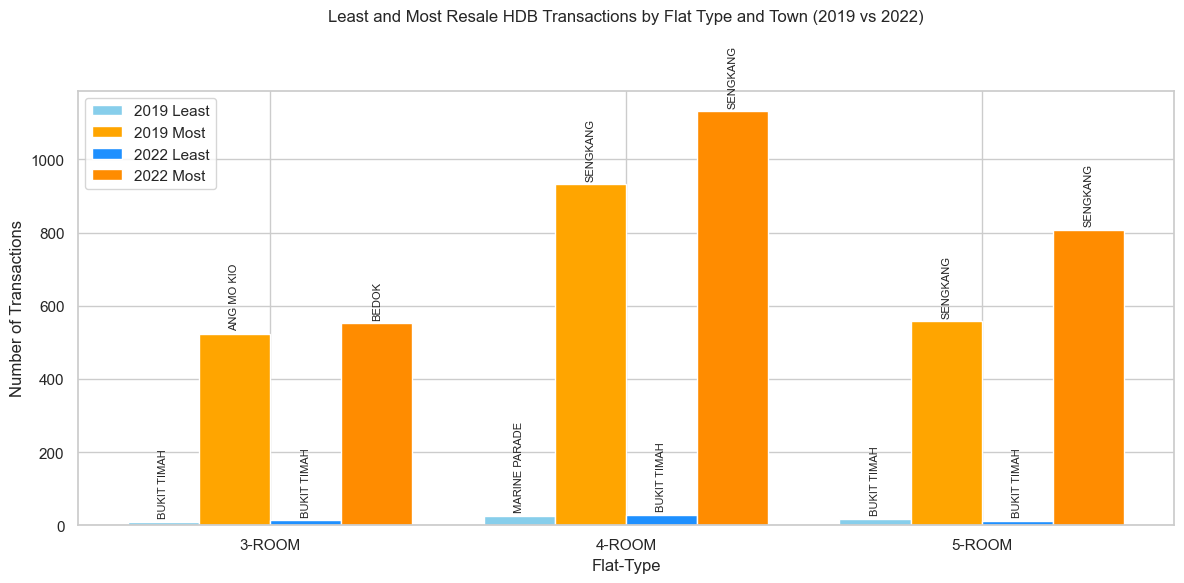

In [116]:
#1. Transactions - Most Vs Least (2019 & 2022)
#This steps is to find out on each 'flat_type' on which 'town' has the most and least transactions based on year basis

tx_sorted = tx.sort_values(['year', 'flat_type', 'transactions'])

least = tx_sorted.groupby(['year', 'flat_type']).head(1).assign(which = 'least')
most = tx_sorted.groupby(['year', 'flat_type']).tail(1).assign(which = 'most')

results = pd.concat([least,most]).sort_values(['year', 'flat_type', 'which']).reset_index(drop = True)
print(results)

flat_types = ['3-ROOM', '4-ROOM', '5-ROOM']
x = np.arange(len(flat_types))  # label locations
bar_width = 0.2

# Filter data based on your result table
data_2019_least = results[(results['year'] == 2019) & (results['which'] == 'least')]
data_2019_most = results[(results['year'] == 2019) & (results['which'] == 'most')]
data_2022_least = results[(results['year'] == 2022) & (results['which'] == 'least')]
data_2022_most = results[(results['year'] == 2022) & (results['which'] == 'most')]

# Extract transactions
counts_2019_least = data_2019_least['transactions'].tolist()
counts_2019_most = data_2019_most['transactions'].tolist()
counts_2022_least = data_2022_least['transactions'].tolist()
counts_2022_most = data_2022_most['transactions'].tolist()

# Extract town names
towns_2019_least = data_2019_least['town'].tolist()
towns_2019_most = data_2019_most['town'].tolist()
towns_2022_least = data_2022_least['town'].tolist()
towns_2022_most = data_2022_most['town'].tolist()

fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars
bars1 = ax.bar(x - 1.5 * bar_width, counts_2019_least, width=bar_width, label='2019 Least', color='skyblue')
bars2 = ax.bar(x - 0.5 * bar_width, counts_2019_most, width=bar_width, label='2019 Most', color='orange')
bars3 = ax.bar(x + 0.5 * bar_width, counts_2022_least, width=bar_width, label='2022 Least', color='dodgerblue')
bars4 = ax.bar(x + 1.5 * bar_width, counts_2022_most, width=bar_width, label='2022 Most', color='darkorange')

# Annotate town names vertically
def annotate_bars(bars, towns):
    for bar, town in zip(bars, towns):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, town,
                ha='center', va='bottom', rotation='vertical', fontsize=8)

annotate_bars(bars1, towns_2019_least)
annotate_bars(bars2, towns_2019_most)
annotate_bars(bars3, towns_2022_least)
annotate_bars(bars4, towns_2022_most)

# Set labels and formatting
ax.set_xticks(x)
ax.set_xticklabels(flat_types)
ax.set_ylabel('Number of Transactions')
ax.set_xlabel('Flat-Type')
ax.set_title('Least and Most Resale HDB Transactions by Flat Type and Town (2019 vs 2022)' , pad= 50)
ax.legend()
plt.tight_layout()
plt.show()

In [ ]:
#1. Most and Least Transaction By Town (2019 vs 2022)
Based on all the analysis above, I analyzed 3-ROOM, 4-ROOM and 5-ROOM flats to identify which towns had the most and least transactions in 2019 and 2022

Findings:
1. In 2019, Sengkang recorded the most transactions for 4-ROOM and 5-ROOM flats and this trend continued on 2022. This can shows that Sengkang town 
remain popular resale hotspots.

2. Bukit Timah had recorded the least transactions across multiple flat types. This shows that Bukit Timah town has low transaction activity due to
fewer HDB developments over the area there.


   year flat_type          town  resale_price   ranked
0  2019    3-ROOM   BUKIT TIMAH        418250  Highest
1  2019    3-ROOM   JURONG WEST        252118   Lowest
0  2019    4-ROOM  CENTRAL AREA        735664  Highest
1  2019    4-ROOM     WOODLANDS        335822   Lowest
0  2019    5-ROOM  CENTRAL AREA        944856  Highest
1  2019    5-ROOM     SEMBAWANG        398854   Lowest
0  2022    3-ROOM     PASIR RIS        474532  Highest
1  2022    3-ROOM       GEYLANG        345107   Lowest
0  2022    4-ROOM  CENTRAL AREA        852343  Highest
1  2022    4-ROOM        YISHUN        468175   Lowest
0  2022    5-ROOM  CENTRAL AREA       1130746  Highest
1  2022    5-ROOM   JURONG WEST        562825   Lowest


C:\Users\User\AppData\Local\Temp\ipykernel_9960\3674394399.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_price.groupby(['year', 'flat_type'], group_keys = False).apply(top_bottom_price)
C:\Users\User\AppData\Local\Temp\ipykernel_9960\3674394399.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results_price = (avg_price.groupby(['year', 'flat_type'], group_keys = False).apply(top_bottom_price)

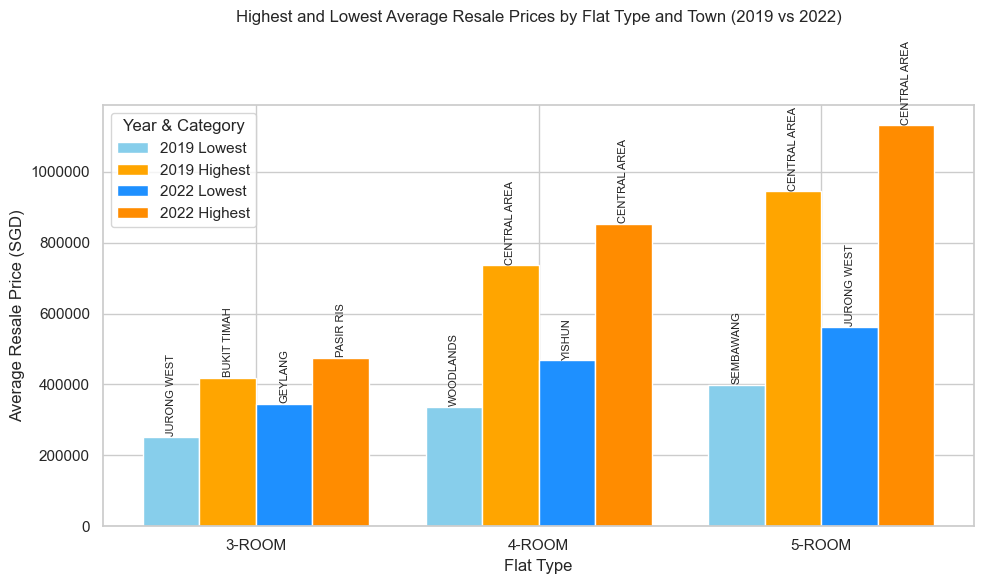

In [129]:
#2. Resale Price - Highest Vs Lowest (2019 & 2022)
#This steps will be analyzing on the 'resale_price' of 'flat_type' on each 'town' and will find out which 'town' has the highest and lowest 'resale_price' based on the 'flat_type'
#The price_data will only filter 'flat_type' for 3,4 and 5-ROOM
price_data = df_focus_345[df_focus_345['flat_type'].isin(['3-ROOM', '4-ROOM', '5-ROOM'])]

#Calculate the average resale_price
avg_price = (price_data.groupby(['year', 'flat_type', 'town'], as_index = False)['resale_price'].mean())

#Find the highest and lowest price 'town' for each 'year' and 'flat_type'
avg_price.groupby(['year', 'flat_type'], group_keys = False).apply(top_bottom_price)
def top_bottom_price(g):
    highest = g.sort_values('resale_price', ascending = False).head(1).assign(ranked = 'Highest')
    lowest = g.sort_values('resale_price', ascending = True).head(1).assign(ranked = 'Lowest')
    return pd.concat([highest, lowest], ignore_index = True)

results_price = (avg_price.groupby(['year', 'flat_type'], group_keys = False).apply(top_bottom_price).sort_values(['year', 'flat_type', 'ranked']))
results_price['resale_price'] = price_results['resale_price'].astype(int)
print(results_price)

# Define consistent order
flat_types = ['3-ROOM', '4-ROOM', '5-ROOM']
years = [2019, 2022]
ranked_order = ['Lowest', 'Highest']
bar_width = 0.2
x = np.arange(len(flat_types))

# Initialize plot
fig, ax = plt.subplots(figsize=(10, 6))

# Color settings
color_map = {
    (2019, 'Lowest'): 'skyblue',
    (2019, 'Highest'): 'orange',
    (2022, 'Lowest'): 'dodgerblue',
    (2022, 'Highest'): 'darkorange',
}

# Grouped bar plotting logic
for i, (year, ranked) in enumerate([(y, r) for y in years for r in ranked_order]):
    bar_pos = x + (i - 1.5) * bar_width
    values = []
    labels = []
    for ft in flat_types:
        row = results_price[
            (results_price['flat_type'] == ft) & 
            (results_price['year'] == year) & 
            (results_price['ranked'] == ranked)
        ]
        if not row.empty:
            values.append(row['resale_price'].values[0])
            labels.append(row['town'].values[0])
        else:
            values.append(0)
            labels.append('N/A')

    bars = ax.bar(bar_pos, values, width=bar_width, label=f"{year} {ranked}", color=color_map[(year, ranked)])

    # Add vertical town labels
    for bar, label in zip(bars, labels):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 2000, label, ha='center', va='bottom', rotation=90, fontsize=8)

# Formatting the chart
ax.set_xlabel('Flat Type')
ax.set_ylabel('Average Resale Price (SGD)')
ax.set_title('Highest and Lowest Average Resale Prices by Flat Type and Town (2019 vs 2022)', pad = 60)
ax.set_xticks(x)
ax.set_xticklabels(flat_types)
ax.legend(title='Year & Category')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

In [ ]:
#2. Highest and Lowest Resale Prices by Town (2019 vs 2022)
I looked at resale prices across towns to find which had the highest and lowest resale price for each flat type

Findings:
1. In 2019, Central Area recorded the highest resale price on 4-ROOM and 5-ROOM flats while Bukit Timah recorded the highest resale value on 3-ROOM flat
while Jurong West(3-ROOM), Woodlands(4-ROOM) and Sembawang(5-ROOM) recorded the lowest resale price.
2. In 2022, Central Area still remained the most expensive flats on 4-ROOM and 5-ROOM flats while town such as Geylang(3-ROOM), Yishun(4-ROOM) and
Jurong West(5-ROOM) recorded the lowest resale price.

Overall, this shows a clear price gap between Central vs non-central Towns, reflecting the location premium

    year flat_type           town  avg_price  transactions   ranked
0   2019    3-ROOM    BUKIT MERAH     690000             1  Highest
1   2019    3-ROOM      SEMBAWANG     287821            23   Lowest
2   2019    4-ROOM    BUKIT MERAH     954357             7  Highest
3   2019    4-ROOM      SEMBAWANG     366665            24   Lowest
4   2019    5-ROOM    BUKIT MERAH    1056333             3  Highest
5   2019    5-ROOM      WOODLANDS     460806            16   Lowest
6   2022    3-ROOM    BUKIT MERAH     711364            11  Highest
7   2022    3-ROOM  CHOA CHU KANG     390296             3   Lowest
8   2022    4-ROOM     QUEENSTOWN     930911             9  Highest
9   2022    4-ROOM  CHOA CHU KANG     492614            13   Lowest
10  2022    5-ROOM    BUKIT MERAH    1366667             3  Highest
11  2022    5-ROOM  CHOA CHU KANG     604148             6   Lowest


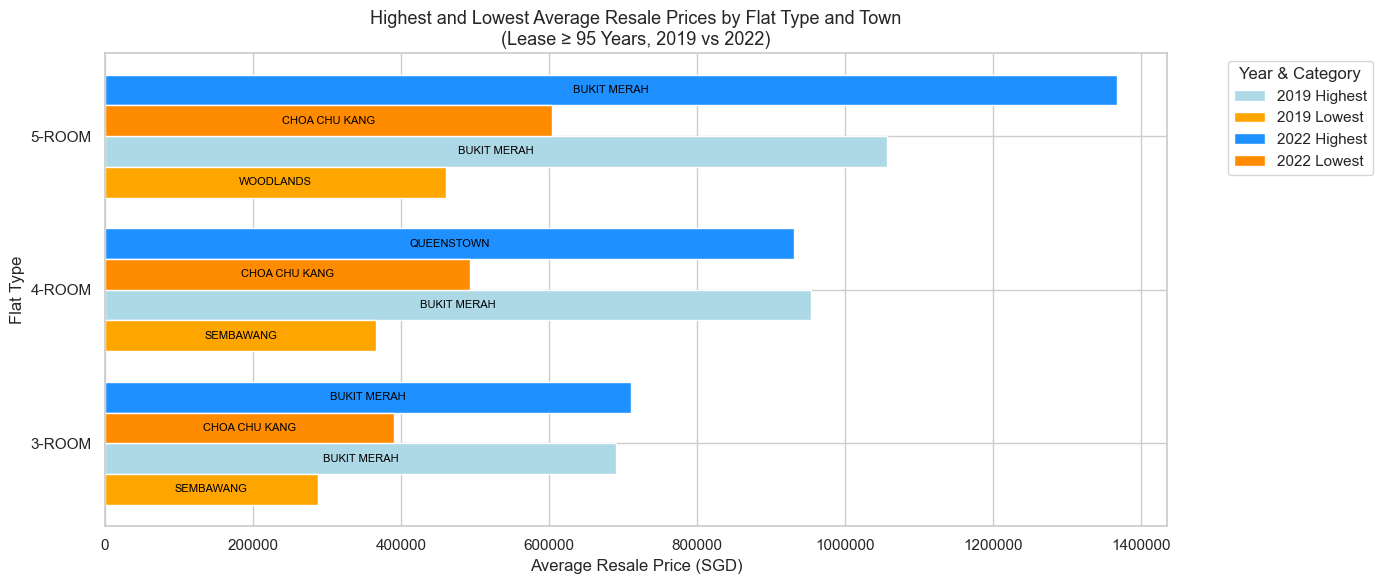

In [144]:
#3. Lease >= 95 years
#This step will be analyze on the 'flat_type' which 'remaining_lease' is more than '95years' and 'town' has the highest and lowest 'resale_price'
#Filter 'flat_type' with 'remaining_lease' > 95 years
# Convert 'remaining_lease' to numeric first
# Assuming the format is like "95 years" or similar, we need to extract the numeric part
df_focus_345['remaining_lease_numeric'] = df_focus_345['remaining_lease'].str.extract('(\d+)').astype(int)

# Now filter using the numeric column
new_flats = df_focus_345[df_focus_345['remaining_lease_numeric'] >= 95]

#Group by 'year', 'flat_type', 'town' to get the average resale price
lease_analysis = (new_flats.groupby(['year', 'flat_type', 'town'], as_index = False).agg(avg_price = ('resale_price', 'mean'), transactions = ('resale_price', 'count')))

#Round avg_price to nearest int
lease_analysis['avg_price'] = lease_analysis['avg_price'].round(0).astype('Int64')
la_sorted = lease_analysis.sort_values(['year', 'flat_type', 'avg_price'])

#Analyze the lowest and highest resale price on each 'flat_type' on 'town'
#lowest
lowest = (la_sorted.groupby(['year', 'flat_type'], as_index = False).first().assign(ranked = 'Lowest'))

#Highest
highest = (la_sorted.groupby(['year', 'flat_type'], as_index = False).last().assign(ranked = 'Highest'))

#Combine the data
result_prices = (pd.concat([lowest,highest], ignore_index = True).sort_values(['year', 'flat_type', 'ranked']).reset_index(drop = True))

print(result_prices)

# Sort to keep consistent bar order
result_prices_sorted = result_prices.sort_values(by=["flat_type", "year", "ranked"])

# Set the style
sns.set(style="whitegrid")

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(14, 6))

# Define color mapping
palette = {
    '2019 Highest': 'lightblue',
    '2019 Lowest': 'orange',
    '2022 Highest': 'dodgerblue',
    '2022 Lowest': 'darkorange',
}

# Bar positions
bar_width = 0.2
flat_types = sorted(result_prices_sorted['flat_type'].unique())
x_pos = {ft: i for i, ft in enumerate(flat_types)}

# Offset per bar group
offset_map = {
    ('2019', 'Lowest'): -1.5 * bar_width,
    ('2019', 'Highest'): -0.5 * bar_width,
    ('2022', 'Lowest'): 0.5 * bar_width,
    ('2022', 'Highest'): 1.5 * bar_width,
}

# Plot each bar individually with label
for _, row in result_prices_sorted.iterrows():
    group = f"{row['year']} {row['ranked']}"
    x = row['avg_price']
    y = x_pos[row['flat_type']] + offset_map[(str(row['year']), row['ranked'])]
    
    # Draw bar
    bar = ax.barh(y, x, height=bar_width, label=group if ax.get_legend_handles_labels()[1].count(group) == 0 else "", color=palette[group])
    
    # Add town label inside the bar (centered)
    ax.text(
        x / 2, y, row['town'],
        va='center', ha='center',
        fontsize=8,
        color='black'
    )

# Format y-axis ticks
ax.set_yticks(list(x_pos.values()))
ax.set_yticklabels(flat_types)
ax.set_ylabel('Flat Type')

# Axis and title
ax.set_xlabel('Average Resale Price (SGD)')
ax.set_title('Highest and Lowest Average Resale Prices by Flat Type and Town\n(Lease ≥ 95 Years, 2019 vs 2022)', fontsize=13)

# Legend
ax.legend(title="Year & Category", bbox_to_anchor=(1.05, 1), loc='upper left')

# Layout and show
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()

In [ ]:
#3. Highest and Lowest Resale Price on flat types which remaining lease >= 95 years
This analysis is to analyze about resale price for flat type after the MOP(Minimum Occupation Period)

Findings:
1. In 2019, towns like Bukit Merah consistently had the highest resale prices while towns like Sembawang(3-ROOM and 4-ROOM) and Woodlands(5-ROOM)
had the lowest resale price after the MOP period.
2. In 2022, Bukit Merah again dominated the highest resale price on 3-ROOM and 5-ROOM flats meanwhile Queenstown had recorded the highest resale price
on 4-ROOM flats. Surprisingly Choa Chu Kang had the lowest resale price across all the flat types.

This analysis suggests that mature central towns(Bukit Merah and Queenstown) remain more valuable resale price even when comparing newly eligible flats
while outer towns tend to have lowest price across all the flats.

In [ ]:
#CONCLUSION
Based on all the analysis that I analyzed, we see that location and maturity of the town are the key driver of resale price on the resale market
while demand patterns remain consistent across years.